In [26]:
import pandas as pd

# Load the data
data = pd.read_csv('election_table.csv')

# Display the first few rows of the data to understand its structure
data.head()

,filename,partisan,level,type,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,#3 candidate,#4 candidate,#5 candidate,bimodality,Ashman_D,Sarle_coefficient,Hartigan_Dip,Amplitude_Ratio,Mode_Distance
0,Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv,DP,FEDERAL,E,8,5,NaN,0.565292,82.995644,76.208084,46.119947,27.879647,27.732753,0.127922,10.838075,0.127922,0.999864,0.623713,0.252252
1,Alaska_08162022_HouseofRepresentativesSpecial.csv,YES,FEDERAL,R,3,4,0.955330,0.955330,75.102196,64.118993,60.495520,NaN,NaN,0.739850,1.916340,0.739850,0.999991,0.874056,0.214214
2,Alaska_11082022_GovernorLieutenantGovernor.csv,YES,STATE,E,4,5,0.839619,0.744512,67.218966,51.789617,49.106137,42.659281,NaN,0.898327,3.713260,0.898327,0.999992,0.376178,0.531532
3,Alaska_11082022_HouseDistrict1.csv,YES,STATE,R,2,3,1.000000,1.000000,63.438293,62.692135,NaN,NaN,NaN,0.930662,3.222705,0.911109,0.999833,0.417968,0.242242
4,Alaska_11082022_HouseDistrict2.csv,YES,STATE,R,2,3,1.000000,1.000000,67.321454,55.282728,NaN,NaN,NaN,0.924696,4.469992,0.944288,0.999837,0.282244,0.228228


In [27]:
# Filter out rows without a race_id
filtered_data = data.dropna(subset=['filename'])

# Extract the locality from the filename using regular expressions
filtered_data['locality'] = filtered_data['filename'].str.extract(r'(^.*?)_\d{8}').fillna('')

# Extract the first 8 digits
filtered_data['date_str'] = filtered_data['filename'].str.extract(r'_(\d{8})')

# Convert the string to a datetime object
filtered_data['date'] = pd.to_datetime(filtered_data['date_str'], format='%m%d%Y', errors='coerce')

# Extract the year from the datetime object
filtered_data['year'] = filtered_data['date'].dt.year

# Drop the intermediate columns
filtered_data = filtered_data.drop(columns=['date_str', 'date'])

filtered_data.head()

,filename,partisan,level,type,candidates,choices,gamma bf,gamma mds,#1 candidate,#2 candidate,...,#4 candidate,#5 candidate,bimodality,Ashman_D,Sarle_coefficient,Hartigan_Dip,Amplitude_Ratio,Mode_Distance,locality,year
0,Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv,DP,FEDERAL,E,8,5,NaN,0.565292,82.995644,76.208084,...,27.879647,27.732753,0.127922,10.838075,0.127922,0.999864,0.623713,0.252252,Alaska,2020
1,Alaska_08162022_HouseofRepresentativesSpecial.csv,YES,FEDERAL,R,3,4,0.955330,0.955330,75.102196,64.118993,...,NaN,NaN,0.739850,1.916340,0.739850,0.999991,0.874056,0.214214,Alaska,2022
2,Alaska_11082022_GovernorLieutenantGovernor.csv,YES,STATE,E,4,5,0.839619,0.744512,67.218966,51.789617,...,42.659281,NaN,0.898327,3.713260,0.898327,0.999992,0.376178,0.531532,Alaska,2022
3,Alaska_11082022_HouseDistrict1.csv,YES,STATE,R,2,3,1.000000,1.000000,63.438293,62.692135,...,NaN,NaN,0.930662,3.222705,0.911109,0.999833,0.417968,0.242242,Alaska,2022
4,Alaska_11082022_HouseDistrict2.csv,YES,STATE,R,2,3,1.000000,1.000000,67.321454,55.282728,...,NaN,NaN,0.924696,4.469992,0.944288,0.999837,0.282244,0.228228,Alaska,2022


In [28]:
import matplotlib.pyplot as plt

def plot(choice):
    
    # Group by locality and {choice}
    grouped_data = filtered_data.groupby(['locality', f'{choice}']).size().reset_index(name='counts')

    # Get unique localities
    localities = grouped_data['locality'].unique()
    n_localities = len(localities)

    # Number of columns (you can change this as desired)
    n_cols = 4
    n_rows = n_localities // n_cols + (n_localities % n_cols > 0)

    # Plot data for each locality
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 3 * n_rows))
    axes = axes.ravel()  # Flatten axes to simplify indexing

    for i, locality in enumerate(localities):
        locality_data = grouped_data[grouped_data['locality'] == locality]
        axes[i].bar(locality_data[f'{choice}'], locality_data['counts'])
        axes[i].set_title(f"Records for {locality}")
        axes[i].set_xlabel(f"{choice.capitalize()}")
        axes[i].set_ylabel("Number of Records")
        axes[i].set_xticks(locality_data[f'{choice}'])
        axes[i].set_xticklabels(locality_data[f'{choice}'], rotation=45)

    # Remove any unused subplots
    if n_localities % n_cols != 0:
        for j in range(n_localities, n_cols * n_rows):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

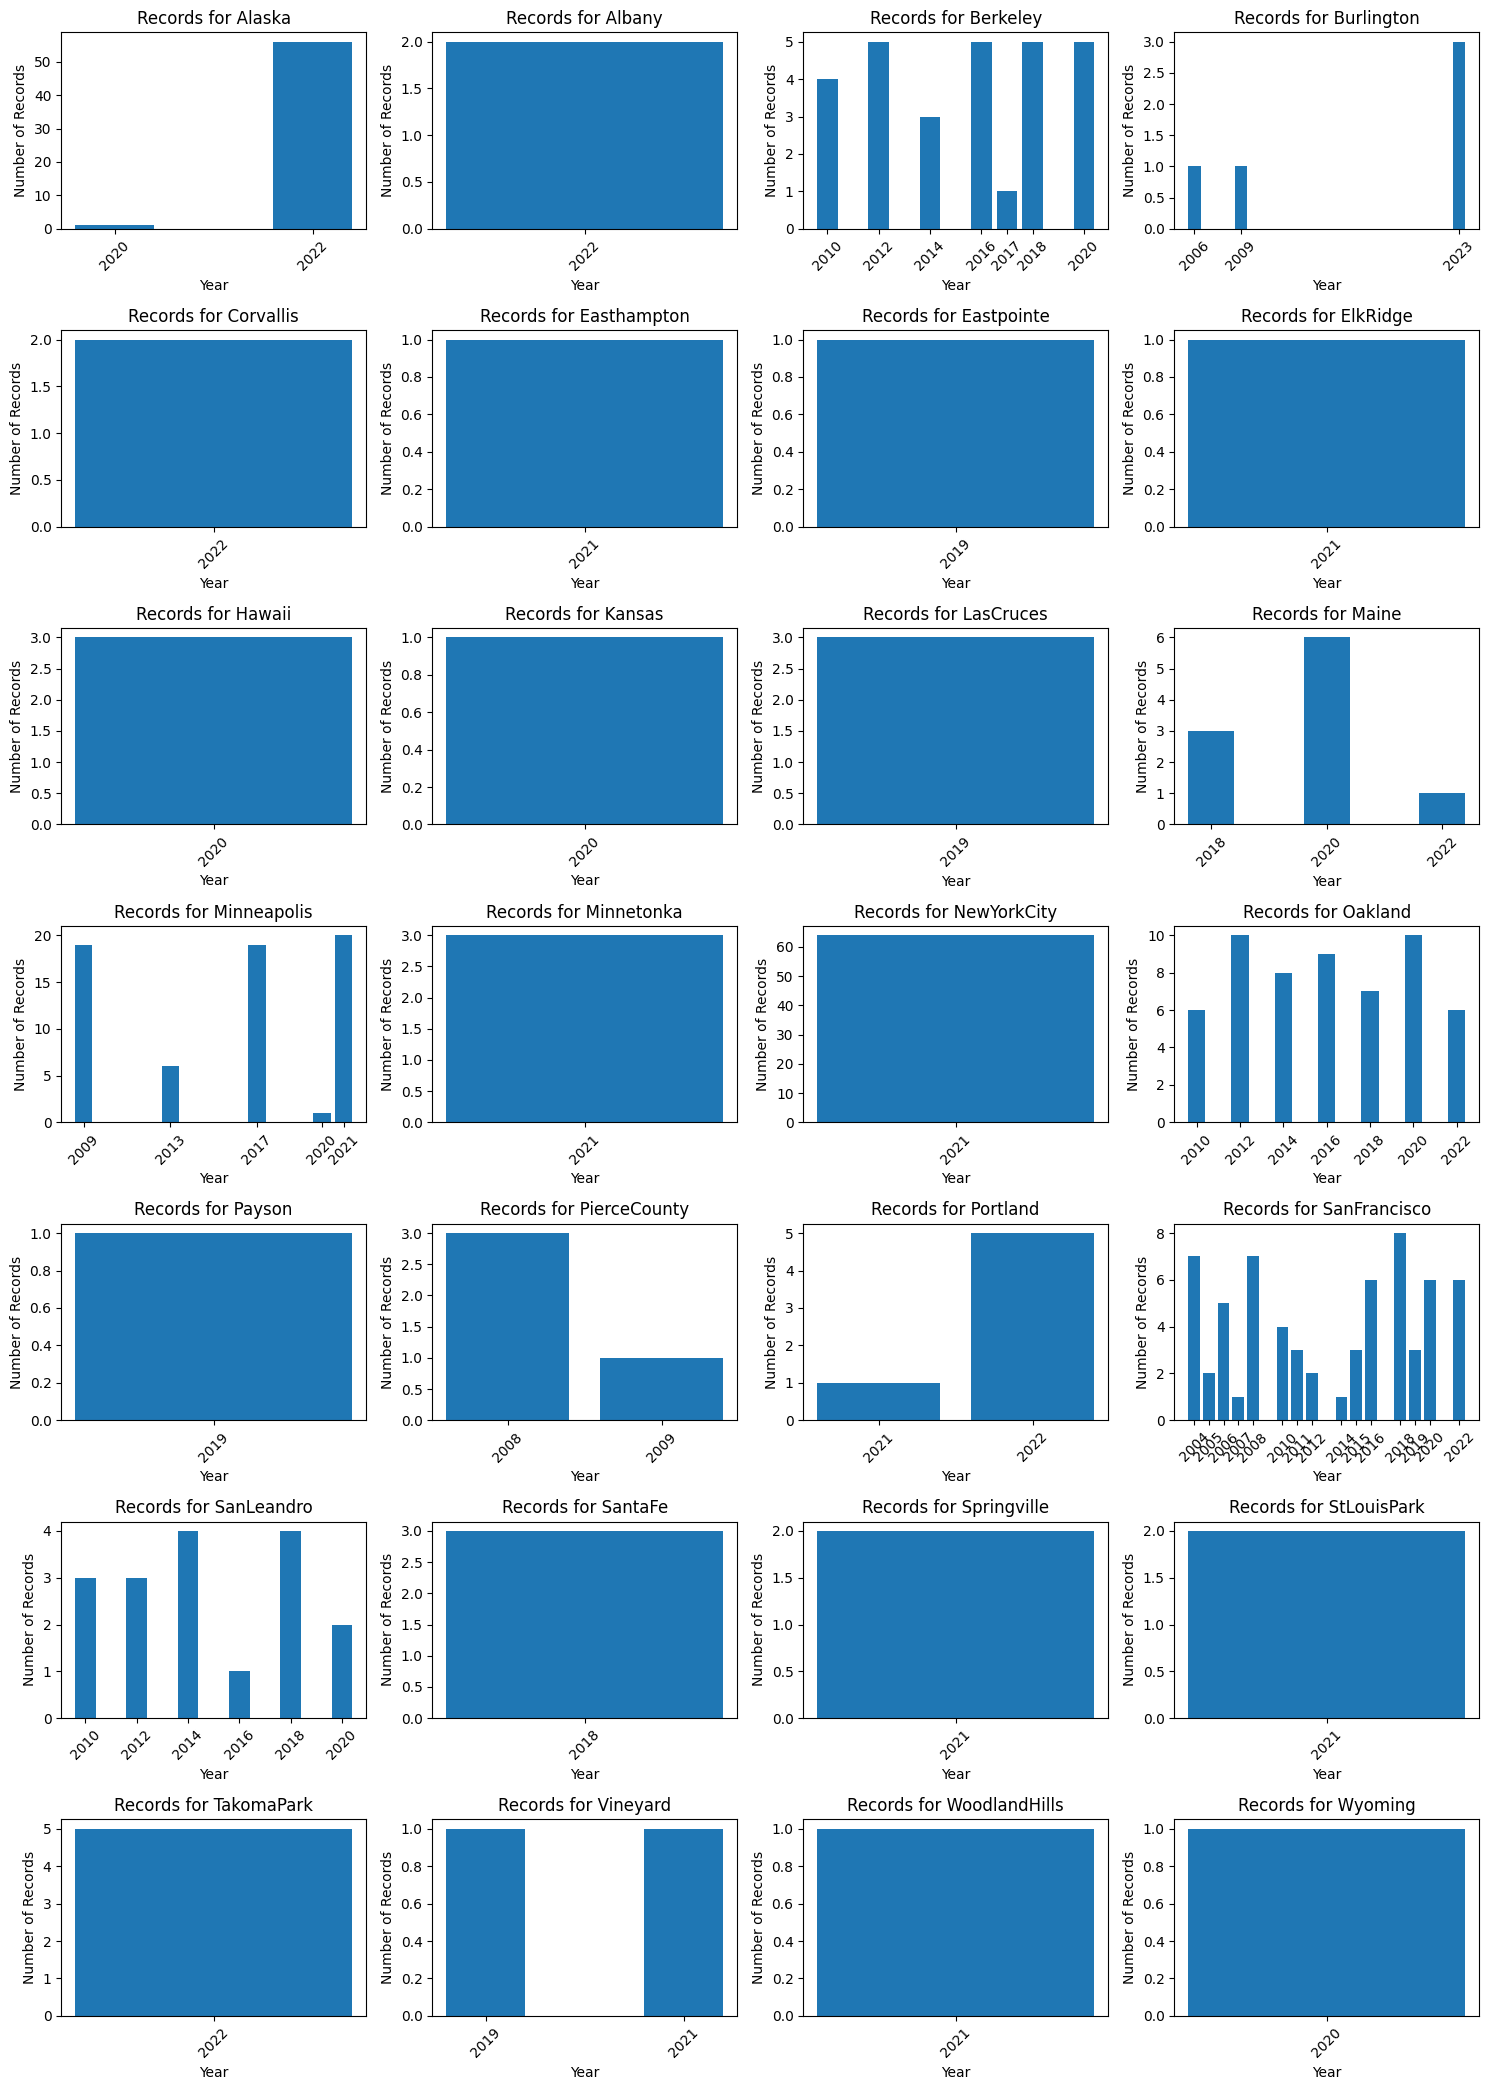

In [29]:
plot('year')

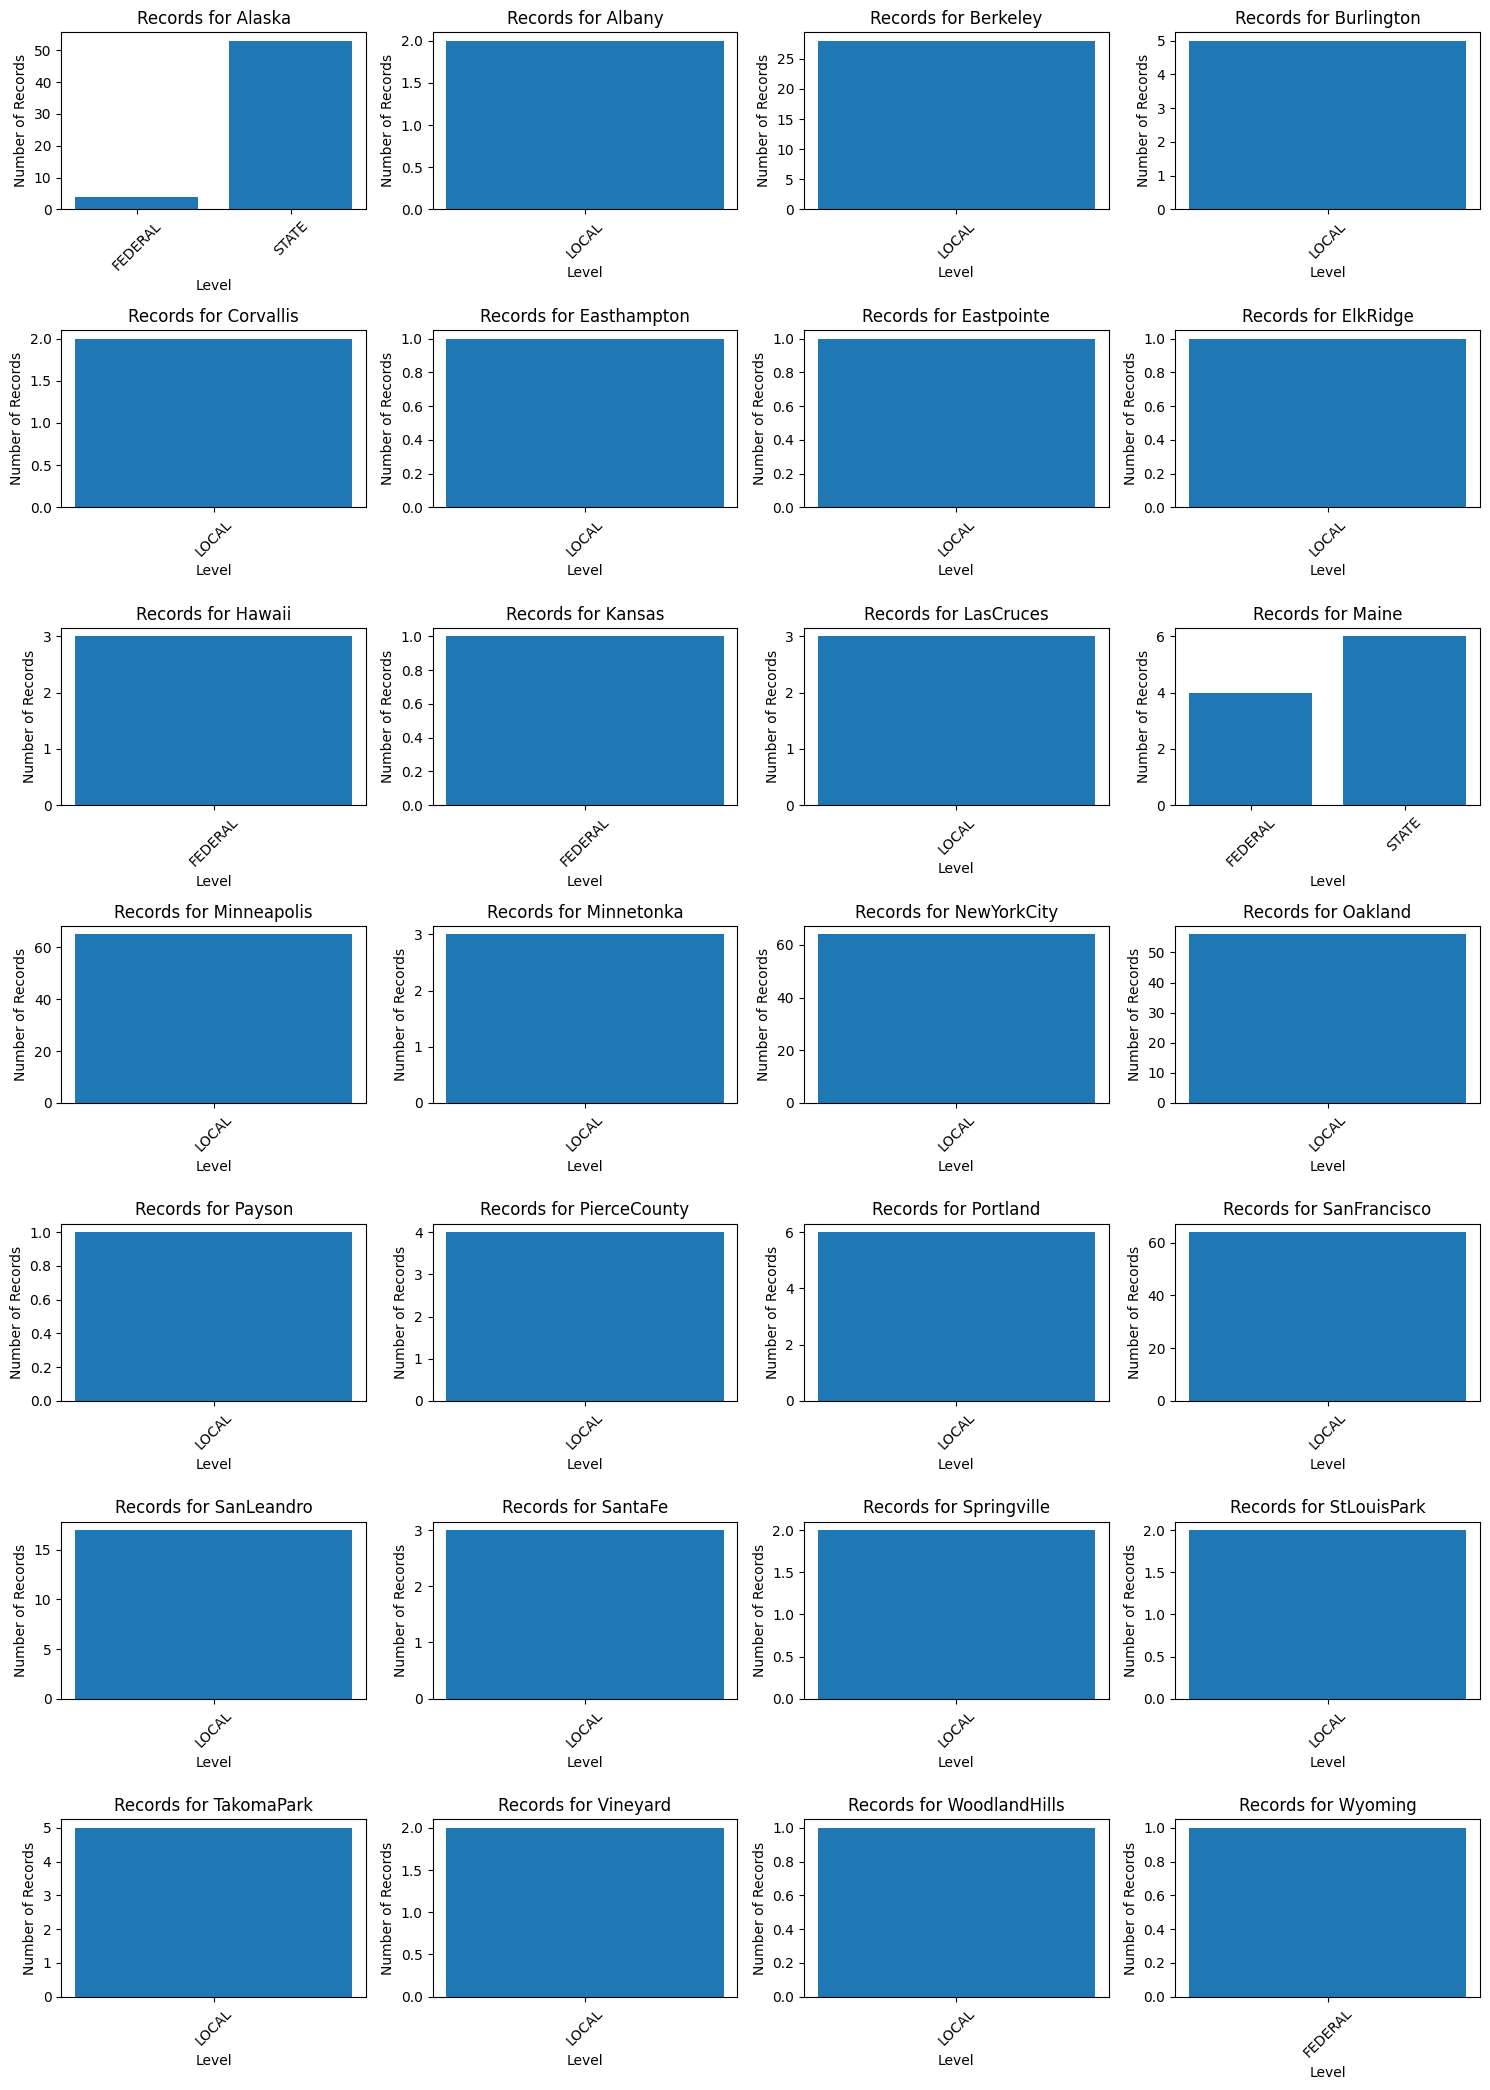

In [30]:
plot('level')

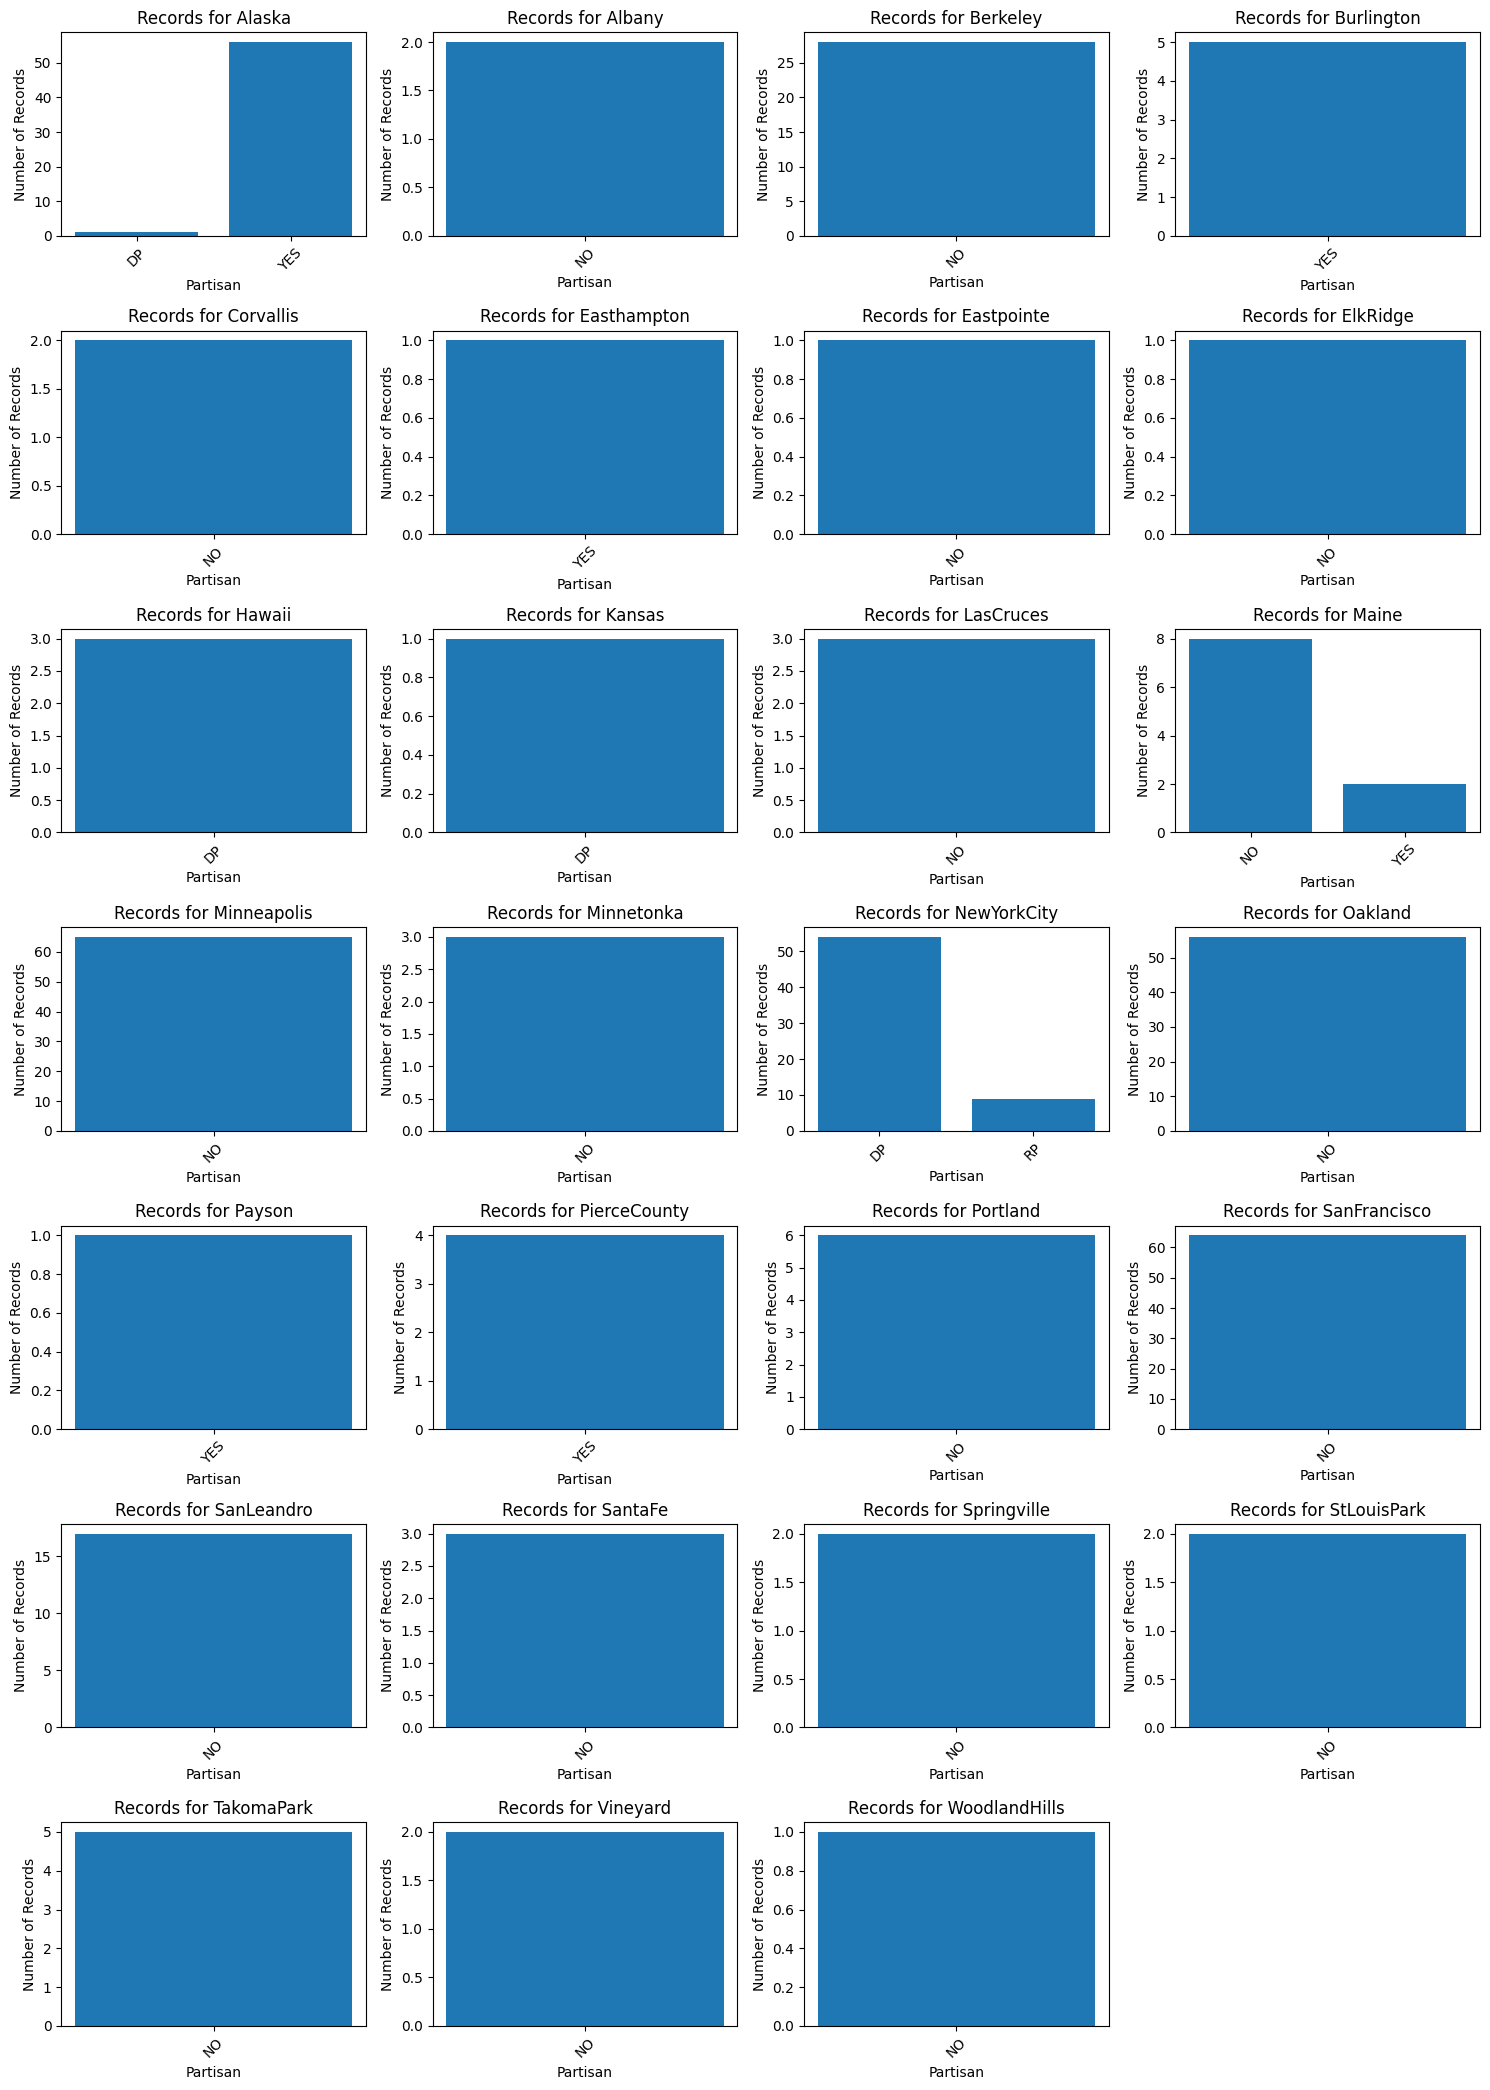

In [31]:
plot('partisan')

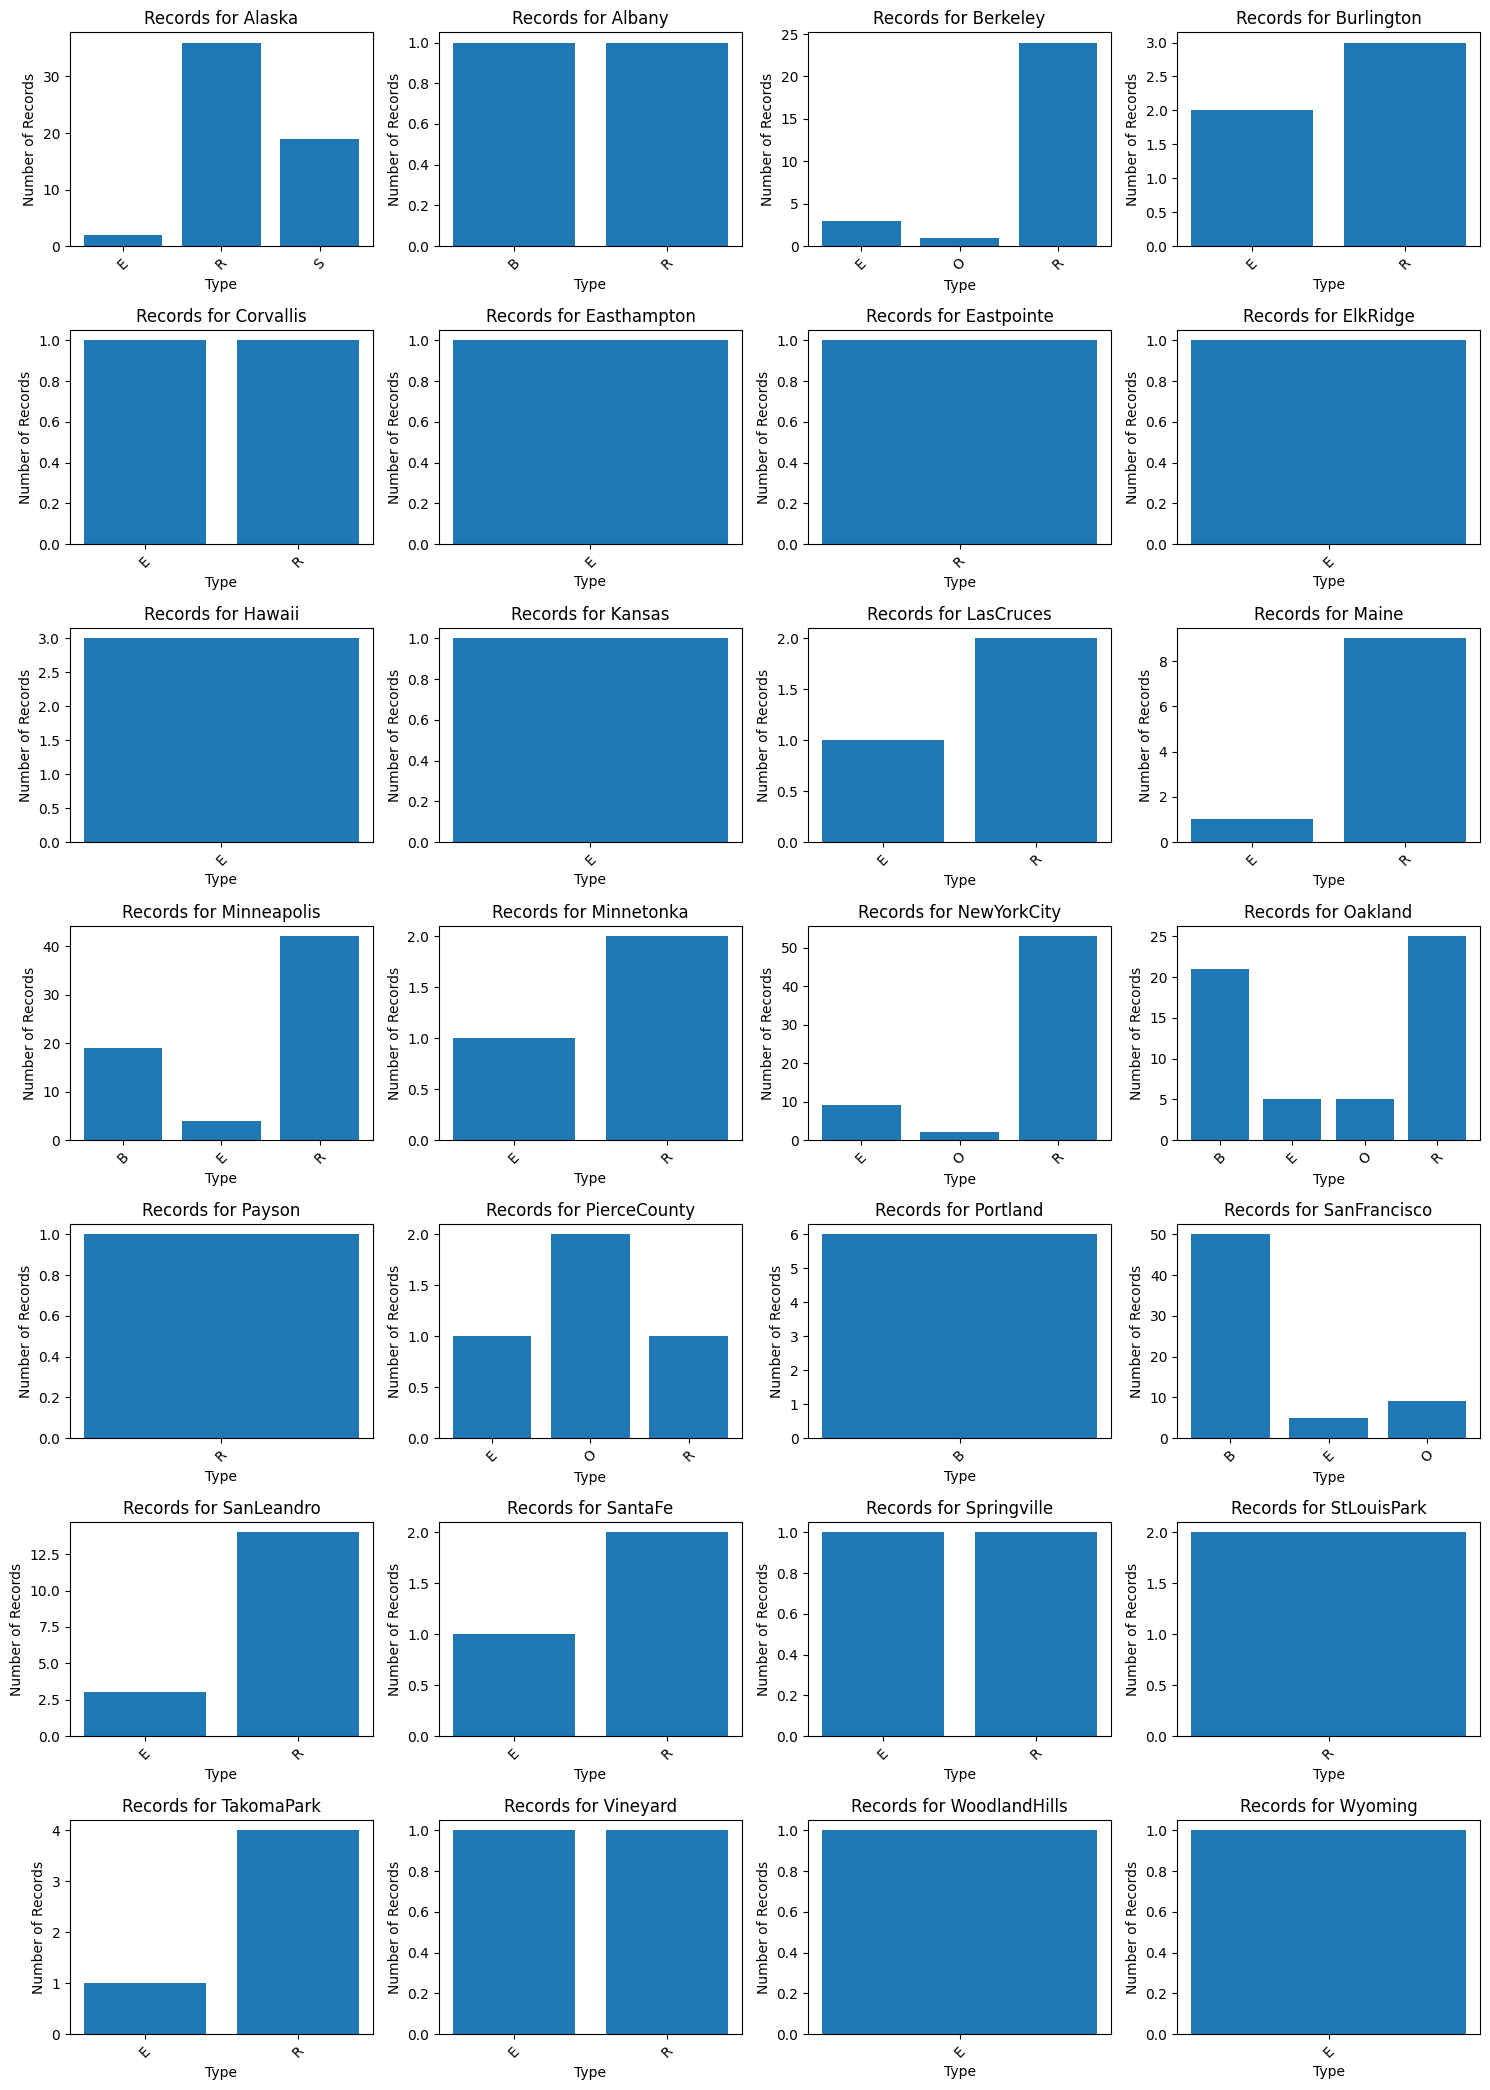

In [32]:
plot('type')